In [75]:
from sqlalchemy import create_engine, text
import pandas as pd
from config import password

In [47]:
engine = create_engine(f'postgresql+psycopg2://{password}@localhost:5432/employeedb')
conn = engine.connect()

In [48]:
departments = pd.read_sql("SELECT * FROM departments;", conn)
departments.head()

,dept_no,dept_name
0,d001,Marketing
1,d002,Finance
2,d003,Human Resources
3,d004,Production
4,d005,Development


In [49]:
titles = pd.read_sql("SELECT * FROM titles;", conn)
titles.head()

,title_id,title
0,s0001,Staff
1,s0002,Senior Staff
2,e0001,Assistant Engineer
3,e0002,Engineer
4,e0003,Senior Engineer


In [50]:
employees = pd.read_sql("SELECT * FROM employees;", conn)
employees.head()

,emp_no,emp_title,birth_date,first_name,last_name,sex,hire_date
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28
1,475053,e0002,1954-11-18,Byong,Delgrande,F,1991-09-07
2,57444,e0002,1958-01-30,Berry,Babb,F,1992-03-21
3,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26
4,282238,e0003,1952-10-28,Abdelkader,Baumann,F,1991-01-18


In [51]:
dept_emp = pd.read_sql("SELECT * FROM dept_emp;", conn)
dept_emp.head()

,emp_no,dept_no
0,10001,d005
1,10002,d007
2,10003,d004
3,10004,d004
4,10005,d003


In [52]:
dept_manager = pd.read_sql("SELECT * FROM dept_manager;", conn)
dept_manager.head()

,dept_no,emp_no
0,d001,110022
1,d001,110039
2,d002,110085
3,d002,110114
4,d003,110183


In [53]:
salaries = pd.read_sql("SELECT * FROM salaries;", conn)
salaries.head()

,emp_no,salary
0,10001,60117.0
1,10002,65828.0
2,10003,40006.0
3,10004,40054.0
4,10005,78228.0


In [66]:
# list the employee number, last name, first name, sex, and salary of each employee
all_employees = pd.read_sql("SELECT e.emp_no, e.last_name, e.first_name, e.sex, s.salary FROM employees AS e INNER JOIN salaries AS s ON e.emp_no = s.emp_no;", conn)
all_employees

300024

In [55]:
# List first name, last name, and hire date for employees who were hired in 1980s
employees_1986 = pd.read_sql(text("SELECT first_name, last_name, hire_date FROM employees WHERE hire_date BETWEEN '01/01/1986' AND '12/31/1986';"), conn)
employees_1986

,first_name,last_name,hire_date
0,Eran,Cusworth,1986-11-14
1,Bojan,Zallocco,1986-10-14
2,Nevio,Demizu,1986-05-18
3,Ziva,Vecchi,1986-07-03
4,Mohit,Speek,1986-01-14
...,...,...,...
36145,Uriel,Heijenga,1986-06-30
36146,Ziyad,Constantine,1986-02-28
36147,Yishay,Maksimenko,1986-01-27
36148,Yannik,Ranai,1986-04-06


In [56]:
#List the manager of each department with the following information: department number, department name, the manager's employee number, last name, first name, salary
dept_manager = pd.read_sql("SELECT dm.dept_no, dtt.dept_name, dm.emp_no, CONCAT(e.first_name, ' ' ,e.last_name) as full_name, s.salary FROM departments as dtt INNER JOIN dept_manager as dm ON dtt.dept_no = dm.dept_no LEFT JOIN employees AS e ON dm.emp_no = e.emp_no LEFT JOIN salaries AS s ON e.emp_no = s.emp_no ORDER BY salary DESC;", conn)
dept_manager

,dept_no,dept_name,emp_no,full_name,salary
0,d008,Research,111400,Arie Staelin,72446.0
1,d007,Sales,111035,Przemyslawa Kaelbling,71612.0
2,d001,Marketing,110022,Margareta Markovitch,71166.0
3,d007,Sales,111133,Hauke Zhang,71148.0
4,d001,Marketing,110039,Vishwani Minakawa,69941.0
5,d006,Quality Management,110725,Peternela Onuegbe,61357.0
6,d002,Finance,110085,Ebru Alpin,60026.0
7,d009,Customer Service,111877,Xiaobin Spinelli,53846.0
8,d002,Finance,110114,Isamu Legleitner,52070.0
9,d006,Quality Management,110800,Sanjoy Quadeer,50457.0


In [57]:
#List the department of each employee with employee number, last_name, first_name and department name
dept_employee = pd.read_sql("SELECT e.emp_no, e.last_name, e.first_name, dtt.dept_name FROM employees AS e INNER JOIN dept_emp AS de ON de.emp_no = e.emp_no INNER JOIN departments AS dtt ON dtt.dept_no = de.dept_no;", conn)
dept_employee

,emp_no,last_name,first_name,dept_name
0,10005,Maliniak,Kyoichi,Human Resources
1,10010,Piveteau,Duangkaew,Production
2,10010,Piveteau,Duangkaew,Quality Management
3,10011,Sluis,Mary,Customer Service
4,10013,Terkki,Eberhardt,Human Resources
...,...,...,...,...
331598,499948,Paludetto,Cordelia,Production
331599,499972,Leuchs,Katsuo,Development
331600,499985,Lukaszewicz,Gila,Research
331601,499987,Dusink,Rimli,Sales


In [58]:
# List first name, last name and sex for employees whose first name is 'Hercules' and last names begin with 'B'
employees_hercules = pd.read_sql(text("SELECT e.first_name, e.last_name, e.sex FROM employees AS e WHERE first_name = 'Hercules' AND last_name LIKE 'B%';"), conn)
employees_hercules

,first_name,last_name,sex
0,Hercules,Baer,M
1,Hercules,Biron,F
2,Hercules,Birge,F
3,Hercules,Berstel,F
4,Hercules,Bernatsky,M
5,Hercules,Bail,F
6,Hercules,Bodoff,M
7,Hercules,Benantar,F
8,Hercules,Basagni,M
9,Hercules,Bernardinello,F


In [59]:
# List all employees in the Sales department, including their employee number, last name, first name, and department name
sales_dept = pd.read_sql(text("SELECT e.emp_no, e.last_name, e.first_name, dtt.dept_name FROM employees AS e INNER JOIN dept_emp AS de ON e.emp_no = de.emp_no INNER JOIN departments AS dtt ON de.dept_no = dtt.dept_no WHERE dtt.dept_name = 'Sales';"), conn)
sales_dept

,emp_no,last_name,first_name,dept_name
0,10002,Simmel,Bezalel,Sales
1,10016,Cappelletti,Kazuhito,Sales
2,10034,Swan,Bader,Sales
3,10041,Lenart,Uri,Sales
4,10050,Dredge,Yinghua,Sales
...,...,...,...,...
52240,499899,Usdin,Mong,Sales
52241,499901,Terekhov,Make,Sales
52242,499902,Wuwongse,Aloke,Sales
52243,499919,Angiulli,Masako,Sales


In [60]:
# List all employees in the Sales and Development departments, including their employee number, last name, first name, and department name.
sales_develop_dept = pd.read_sql("SELECT e.emp_no, e.last_name, e.first_name, d.dept_name FROM employees AS e INNER JOIN dept_emp ON e.emp_no = dept_emp.emp_no INNER JOIN departments AS d ON dept_emp.dept_no = d.dept_no WHERE d.dept_name IN ('Sales','Development');", conn)
sales_develop_dept

,emp_no,last_name,first_name,dept_name
0,10001,Facello,Georgi,Development
1,10002,Simmel,Bezalel,Sales
2,10006,Preusig,Anneke,Development
3,10008,Kalloufi,Saniya,Development
4,10012,Bridgland,Patricio,Development
...,...,...,...,...
137947,499997,Lenart,Berhard,Development
137948,499746,Driscoll,Kiyotoshi,Development
137949,499750,Melter,Maya,Sales
137950,499752,Stranks,Palash,Sales


In [61]:
#List the frequency count of employee's last name in desc order
last_name_count = pd.read_sql("SELECT last_name, COUNT(last_name) AS total_count FROM employees GROUP BY last_name ORDER BY total_count DESC;", conn)
last_name_count

,last_name,total_count
0,Baba,226
1,Coorg,223
2,Gelosh,223
3,Sudbeck,222
4,Farris,222
...,...,...
1633,Georgatos,148
1634,Zykh,148
1635,Merro,147
1636,Sadowsky,145


In [62]:
#List the top 10 highest paid positions, people, and gender
top10position_salaries = pd.read_sql("SELECT t.title, CONCAT(e.first_name, ' ' , e.last_name) AS full_name, e.sex, s.salary FROM employees AS e INNER JOIN titles AS t ON e.emp_title = t.title_id INNER JOIN salaries AS s ON e.emp_no = s.emp_no ORDER BY s.salary DESC LIMIT 10;",conn)
top10position_salaries

,title,full_name,sex,salary
0,Staff,Charmane Griswold,M,129492.0
1,Senior Staff,Slavian Peac,M,127238.0
2,Staff,Nahid Varker,M,127041.0
3,Staff,Poorav Esposito,M,126703.0
4,Staff,Juichirou Thambidurai,M,125469.0
5,Staff,Toshimo Reghbati,M,124357.0
6,Senior Staff,Radoslaw Pfau,M,123749.0
7,Staff,Tsutomu Alameldin,M,123668.0
8,Staff,Martine Heydon,F,123477.0
9,Staff,Chinhyun Klyachko,M,122726.0


In [63]:
#List the top 10 lowest paid positions, people, and gender
top10position_salaries = pd.read_sql("SELECT t.title, CONCAT(e.first_name, ' ' , e.last_name) AS full_name, e.sex, s.salary FROM employees AS e INNER JOIN titles AS t ON e.emp_title = t.title_id INNER JOIN salaries AS s ON e.emp_no = s.emp_no ORDER BY s.salary ASC LIMIT 10;",conn)
top10position_salaries

,title,full_name,sex,salary
0,Staff,Tsvetan Matzel,F,40000.0
1,Engineer,Evgueni Srimani,F,40000.0
2,Staff,Mechthild Bonifati,M,40000.0
3,Staff,Kazuhito Encarnacion,M,40000.0
4,Staff,Kayoko Valtorta,M,40000.0
5,Senior Engineer,Amabile Gomatam,M,40000.0
6,Senior Engineer,Sibyl Nooteboom,M,40000.0
7,Senior Engineer,Hironoby Sidou,F,40000.0
8,Senior Engineer,Subir Baja,F,40000.0
9,Staff,Yoshimitsu Shobatake,M,40000.0


In [64]:
#List the total employees, total male/female, avg salary, total_salary in each department grouped by department and sex
dept_info = pd.read_sql("SELECT dtt.dept_name, COUNT(de.emp_no) AS total_employees, AVG(s.salary) as avg_salary, SUM(s.salary) as total_salary, e.sex, COUNT(e.sex) as gender_count FROM departments AS dtt INNER JOIN dept_emp AS de ON dtt.dept_no = de.dept_no INNER JOIN employees AS e ON e.emp_no = de.emp_no INNER JOIN salaries AS s ON s.emp_no = e.emp_no GROUP BY dtt.dept_name, e.sex ORDER BY avg_salary DESC;", conn)
dept_info

,dept_name,total_employees,avg_salary,total_salary,sex,gender_count
0,Sales,31391,69892.870313,2.194007e+09,M,31391
1,Sales,20854,69740.692002,1.454372e+09,F,20854
2,Marketing,12174,61204.985379,7.451095e+08,M,12174
3,Marketing,8037,60930.656962,4.896997e+08,F,8037
4,Finance,7015,59707.691661,4.188495e+08,F,7015
5,Finance,10331,59415.247411,6.138189e+08,M,10331
6,Research,12687,48863.007488,6.199250e+08,M,12687
7,Research,8439,48830.919777,4.120841e+08,F,8439
8,Production,43936,48797.159027,2.143952e+09,M,43936
9,Development,51449,48714.302027,2.506302e+09,M,51449


Text(0.5, 1.0, 'Salary Range')

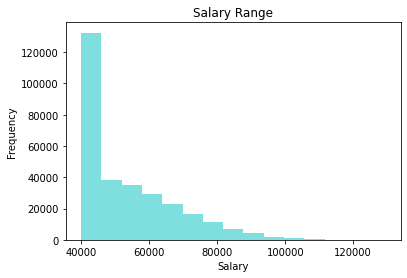

In [92]:
# list the employee number, last name, first name, sex, and salary of each employee
all_employees = pd.read_sql("SELECT e.emp_no, e.last_name, e.first_name, e.sex, s.salary FROM employees AS e INNER JOIN salaries AS s ON e.emp_no = s.emp_no;", conn)
all_employees
#Generate normal distribution of Salary
employee_salary = all_employees['salary']
ax = employee_salary.plot.hist(bins=15, alpha=0.5, color='c')
ax.set_xlabel('Salary')
ax.set_title('Salary Range')

<AxesSubplot:xlabel='title'>

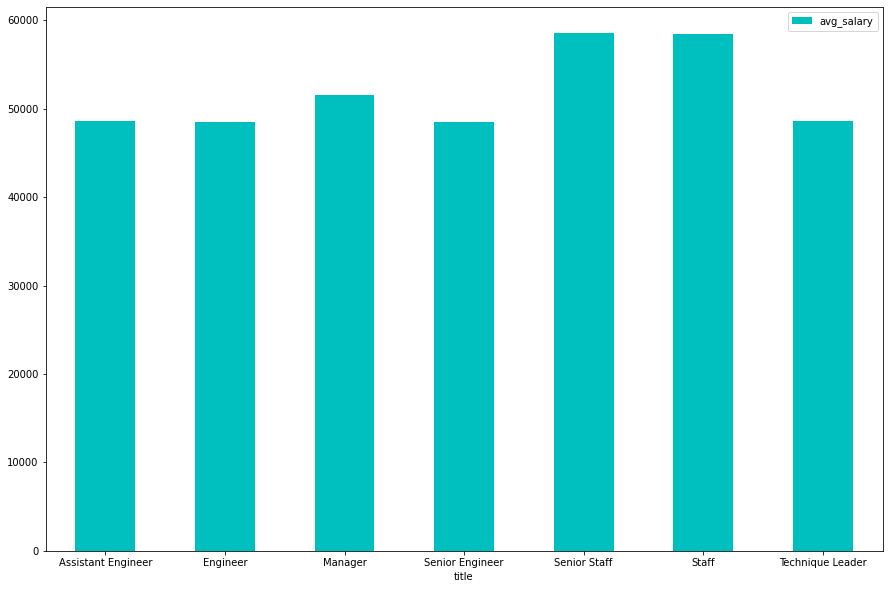

In [91]:
#Generate Bar chart of average salary by title
title_salary = pd.read_sql("SELECT t.title, AVG(s.salary) as avg_salary FROM titles as t INNER JOIN employees AS e ON t.title_id = e.emp_title INNER JOIN salaries as s ON e.emp_no = s.emp_no GROUP BY t.title", conn)
title_salary.head()

title_salary.plot.bar(x='title', y='avg_salary', rot=0, figsize=(15,10), color="c")